In [2]:
! kaggle datasets download najzeko/steam-reviews-2021

Dataset URL: https://www.kaggle.com/datasets/najzeko/steam-reviews-2021
License(s): GPL-2.0
100% 2.96G/2.97G [00:48<00:00, 76.3MB/s]
100% 2.97G/2.97G [00:48<00:00, 65.3MB/s]


In [3]:
!unzip steam-reviews-2021.zip

Archive:  steam-reviews-2021.zip
  inflating: steam_reviews.csv       


In [4]:
# Function to parse time columns

def parse_time(time_in_secs):
    return pd.to_datetime(time_in_secs, unit = 's')

In [5]:
import pandas as pd
df = pd.read_csv('steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])

<ipython-input-5-75f6ca6b0c48>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])
<ipython-input-5-75f6ca6b0c48>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('steam_reviews.csv', header = 'infer', nrows = 7000000, parse_dates= ['timestamp_created', 'timestamp_updated','author.last_played'])
<ipython-input-5-75f6ca6b0c48>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('steam_reviews.csv', 

## **RQ1**


In [6]:
# 1 EDA
# 1.1 removing Na Values and counting the Null values

print(df.isnull().sum())
df = df.dropna()

Unnamed: 0                            0
app_id                                0
app_name                              0
review_id                             0
language                              0
review                            12265
timestamp_created                     0
timestamp_updated                     0
recommended                           0
votes_helpful                         0
votes_funny                           0
weighted_vote_score                   0
comment_count                         0
steam_purchase                        0
received_for_free                     0
written_during_early_access           0
author.steamid                        0
author.num_games_owned                0
author.num_reviews                    0
author.playtime_forever               2
author.playtime_last_two_weeks        2
author.playtime_at_review          9158
author.last_played                    2
dtype: int64


In [8]:
# 1.1.1 Create subdf where duplicates are eliminated. It can be helpful for next exercises.

df_no_duplicates = df.drop_duplicates(subset=['review', 'author.steamid'])
df_no_duplicates.reset_index(drop=True, inplace=True)




In [9]:
# 1.2 Info of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6978576 entries, 0 to 6999999
Data columns (total 23 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   Unnamed: 0                      int64  
 1   app_id                          int64  
 2   app_name                        object 
 3   review_id                       int64  
 4   language                        object 
 5   review                          object 
 6   timestamp_created               object 
 7   timestamp_updated               object 
 8   recommended                     bool   
 9   votes_helpful                   int64  
 10  votes_funny                     int64  
 11  weighted_vote_score             float64
 12  comment_count                   int64  
 13  steam_purchase                  bool   
 14  received_for_free               bool   
 15  written_during_early_access     bool   
 16  author.steamid                  int64  
 17  author.num_games_owned          

In [10]:
df.describe()

,Unnamed: 0,app_id,review_id,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06,6.978576e+06
mean,3.500337e+06,3.668309e+05,5.391531e+07,1.667985e+00,1.070892e+05,1.543210e-01,1.119499e-01,7.656120e+16,1.890789e+06,6.302311e+05,1.493361e+04,1.543519e+02,8.138046e+03
std,2.020657e+06,2.727353e+05,2.079224e+07,3.202398e+01,2.144597e+07,2.390317e-01,1.561739e+00,3.288977e+08,2.883613e+09,1.664855e+09,3.627789e+04,6.800608e+02,2.382861e+04
min,0.000000e+00,7.000000e+01,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
25%,1.750672e+06,2.338600e+05,3.924000e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,2.100000e+01,2.000000e+00,1.322000e+03,0.000000e+00,5.460000e+02
50%,3.500668e+06,3.595500e+05,5.702619e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.656120e+16,5.700000e+01,4.000000e+00,4.278000e+03,0.000000e+00,1.848000e+03
75%,5.250622e+06,4.319600e+05,7.131496e+07,1.000000e+00,0.000000e+00,4.761905e-01,0.000000e+00,7.656120e+16,1.360000e+02,9.000000e+00,1.322300e+04,0.000000e+00,6.150000e+03
max,7.000000e+06,1.225330e+06,8.521834e+07,2.960800e+04,4.294967e+09,9.959868e-01,7.580000e+02,7.656120e+16,4.398047e+12,4.398047e+12,3.470649e+06,2.213400e+04,3.228103e+06


In [11]:
df.head()

,Unnamed: 0,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,1611381629,1611381629,True,0,...,True,False,False,76561199095369542,6,2,1909.0,1448.0,1909.0,1611343383.0
1,1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,1611381030,1611381030,True,0,...,True,False,False,76561198949504115,30,10,2764.0,2743.0,2674.0,1611386307.0
2,2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,1611380800,1611380800,True,0,...,True,False,False,76561199090098988,5,1,1061.0,1061.0,1060.0,1611383777.0
3,3,292030,The Witcher 3: Wild Hunt,85184605,english,"One of the best RPG's of all time, worthy of a...",1611379970,1611379970,True,0,...,True,False,False,76561199054755373,5,3,5587.0,3200.0,5524.0,1611383744.0
4,4,292030,The Witcher 3: Wild Hunt,85184287,schinese,大作,1611379427,1611379427,True,0,...,True,False,False,76561199028326951,7,4,217.0,42.0,217.0,1610788249.0


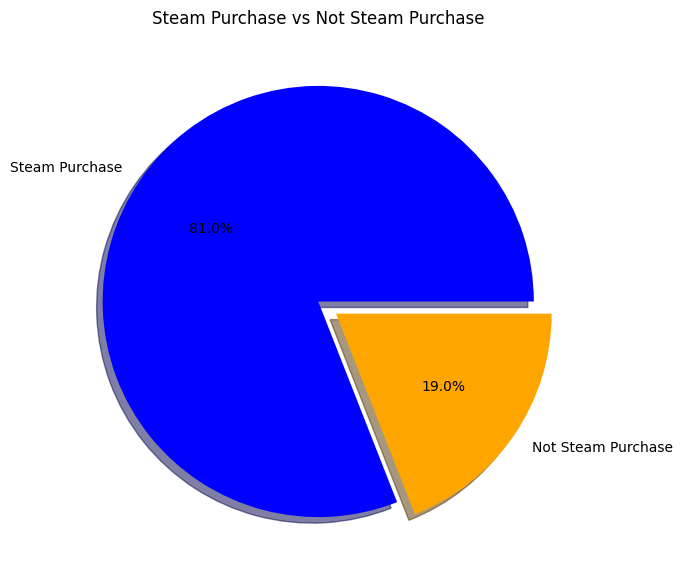

steam_purchase
True     5649850
False    1328726
Name: count, dtype: int64


In [12]:
# 1.2 Some Plots
import matplotlib.pyplot as plt
import seaborn as sns

# A) We'll do two pie plots of: steam purchase (True/False) ; received for free (True/False)
# Our objective is to see if -- "steam purchase" == False corresponds to "received for free" == True -- or not

# Plot of steam purchase
explode = [0,0.1]
colors = "blue", "orange"
plt.figure(figsize = (7,7))
plt.pie(df['steam_purchase'].value_counts(), labels = ['Steam Purchase', 'Not Steam Purchase'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode,
        shadow = True)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.title('Steam Purchase vs Not Steam Purchase')
plt.show()

print(df['steam_purchase'].value_counts())

# Its pretty obvious from the result that if someone didn't purchase on steam the game
# he won't necessary receive it for free. We will study this case better in the next RQ

# (...)


received_for_free
False    6778071
True      200505
Name: count, dtype: int64


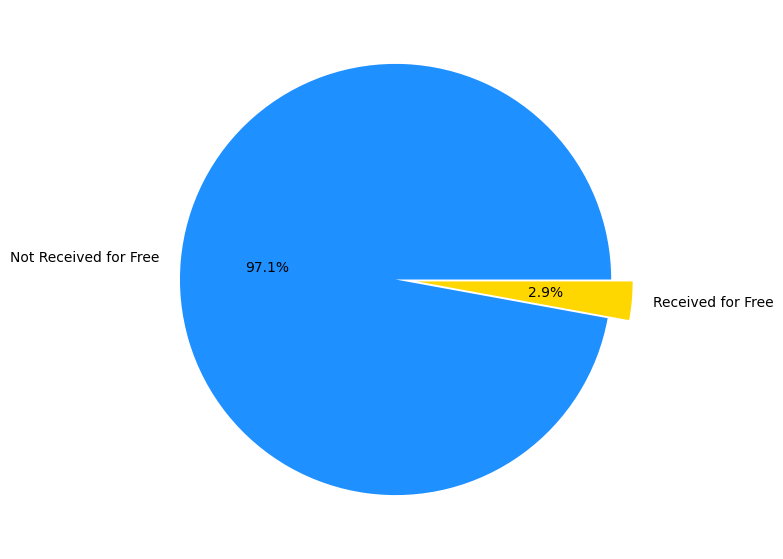

In [15]:
# Plot of received for free

colors = "dodgerblue", "gold"
explode = [0,0.1]
plt.figure(figsize = (7,7))
plt.pie(df['received_for_free'].value_counts(), labels = ['Not Received for Free', 'Received for Free'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode)

print(df['received_for_free'].value_counts())

# (...)

# 81.0% of the people purchased the game on steam while 19.0% of the people did not.
# At the same time, 97.1% did not received the game for free, while 2.9% did it.

# Therefore, there is a part of our population that got the apps in other ways; it could
# be that they bought it from other digital platforms or from a physical store (if
# that's possible). It would be interesting to understand why people should write
# a review on "steam" while they get the app elsewhere (even if they are a minority).



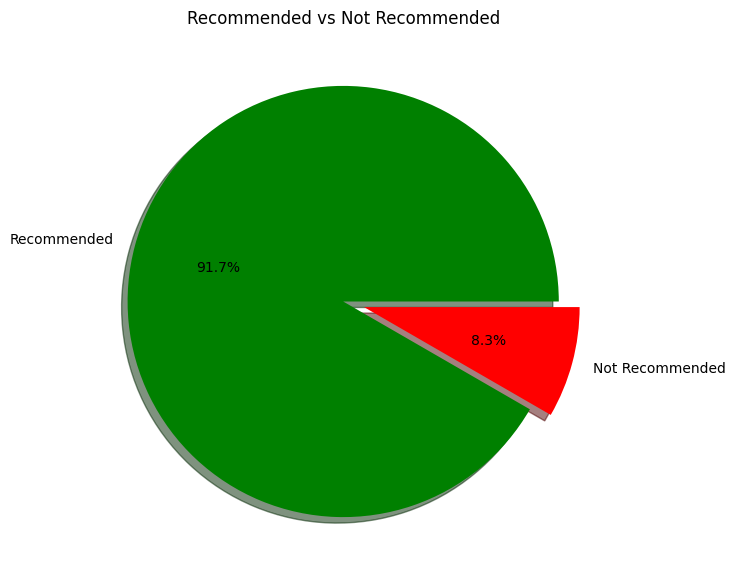

recommended
True     6396863
False     581713
Name: count, dtype: int64


In [17]:
# B) Pie Plot of Recommendations

plt.figure(figsize = (7,7))
colors = "green", "red"
explode = [0,0.1]
plt.pie(df['recommended'].value_counts(), labels = ['Recommended', 'Not Recommended'], autopct = '%1.1f%%',
        colors = colors,
        explode = explode,
        shadow = True)

plt.title('Recommended vs Not Recommended')
plt.show()

print(df['recommended'].value_counts())

# From this pieplot we can see that:
# 1) 91.7% of the reviews recommend the app/game
# 2) 8.3% of the reviews do not recommend the app/game

# Such a high recommendation value is an indicator of reliability,
# which can positively affect the growth of the user base, as new users will be more
# likely to try the game/app based on positive feedback. This could be part of
# an attractive loop in the digital platform.

# Instead, a low percentage of users who do not recommend the app suggests that the problems
# encountered by these users are probably less common or concern specific aspects
# that have not affected the majority of the apps.

# We should also consider that in digital platforms like "steam" there could be
# reviews influenced by aspects beyond the control of the app distributor
# (such as price changes), by personal taste or by strategic distortions such as fake reviews
# (which can negatively affect the number of recommendations in an application).


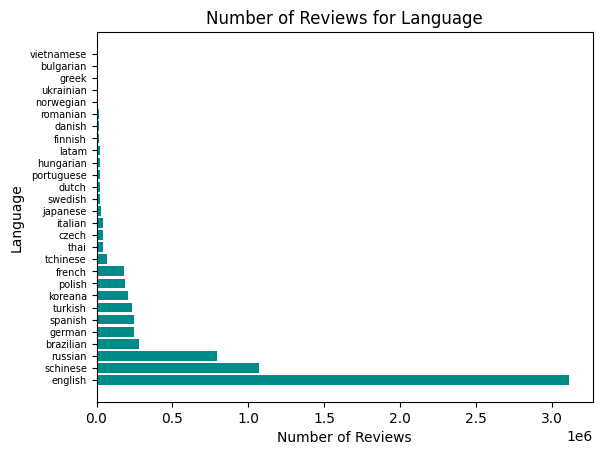

In [10]:
# C) BarPlot of Reviews' languages

plt.barh(df['language'].value_counts().index, df['language'].value_counts().values, color = "darkcyan")
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 7)
plt.xlabel('Number of Reviews')
plt.ylabel('Language')
plt.title('Number of Reviews for Language')
plt.show()

# from this analisys we can see that the most used languages for reviewing are:
# 1. english, 2. simple chinese, 3. russian (descending order for number of reviews)
# at the same time, the least used languages are:
# 1. vietnamese, 2. bulgarian, 3. greek (ascending order for number of reviews)



                           app_name  author.playtime_forever
77   Tom Clancy's Rainbow Six Siege             2.577154e+10
31                      Garry's Mod             2.222260e+10
21                 Dead by Daylight             9.704477e+09
26           Euro Truck Simulator 2             5.987004e+09
61       Sid Meier's Civilization V             4.327697e+09
..                              ...                      ...
23  Don't Escape: 4 Days to Survive             9.726340e+05
38            Hunt Down The Freeman             8.911170e+05
54                  Rapture Rejects             5.384870e+05
59        Shadow Complex Remastered             4.639810e+05
24                      Down To One             4.253940e+05

[88 rows x 2 columns]


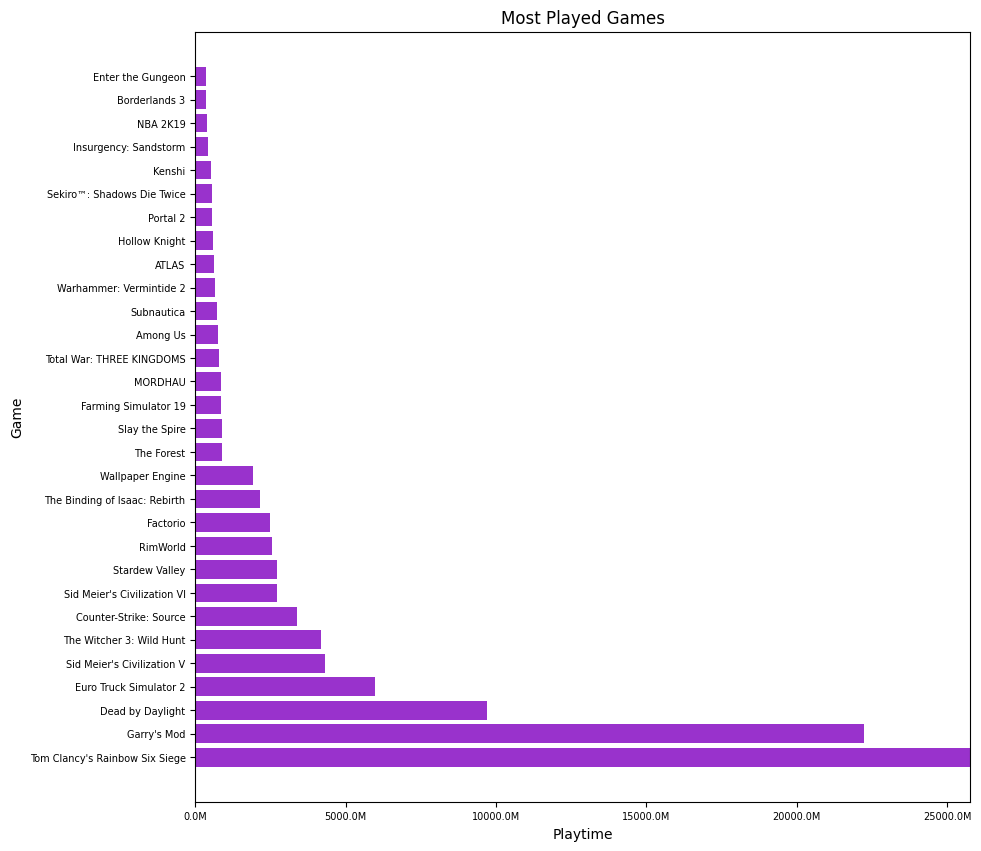

In [17]:
# Most played apps/games

import matplotlib.ticker as ticker

most_played_games = df.groupby('app_name')['author.playtime_forever'].sum().reset_index().sort_values('author.playtime_forever', ascending = False)
print(most_played_games)

plt.figure(figsize = (10, 10))
plt.barh(most_played_games['app_name'].head(30), most_played_games['author.playtime_forever'].head(30), color = "darkorchid")
plt.xticks(fontsize = 7)
plt.yticks(fontsize = 7)
plt.xlim(0, most_played_games['author.playtime_forever'].max() + 1000000)


######################################
def millions(x, pos):
    return f'{x * 1e-6:.1f}M'

# define the millions function to change the xi's

######################################


plt.gca().xaxis.set_major_formatter(ticker.FuncFormatter(millions))
plt.xlabel('Playtime')
plt.ylabel('App')
plt.title('Most Played Apps')
plt.show()

# we can see the most and the least played games (using the variable "author.playtime_forever" --> in hours)
# they're printed in the output (see below ->)

In [18]:
# Playtime after reviews

df['playtime_after_review'] = df['author.playtime_forever'] - df['author.playtime_at_review']
print(df[['author.steamid','author.playtime_forever','author.playtime_at_review','playtime_after_review']])

average_time_after_review = df['playtime_after_review'].mean()
print(f'Average time spent after the review: {average_time_after_review}')

# now, we want to find the playtime after that the author reviewed the game, to see if they continued
# it or not, and if they did, how much time they spent on it


            author.steamid  author.playtime_forever  \
0        76561199095369542                   1909.0   
1        76561198949504115                   2764.0   
2        76561199090098988                   1061.0   
3        76561199054755373                   5587.0   
4        76561199028326951                    217.0   
...                    ...                      ...   
6999995  76561198862012910                   3401.0   
6999996  76561199058577709                   5744.0   
6999997  76561198999736722                   1348.0   
6999998  76561198068603195                   4274.0   
6999999  76561198972736489                   4556.0   

         author.playtime_at_review  playtime_after_review  
0                           1909.0                    0.0  
1                           2674.0                   90.0  
2                           1060.0                    1.0  
3                           5524.0                   63.0  
4                            217.0     

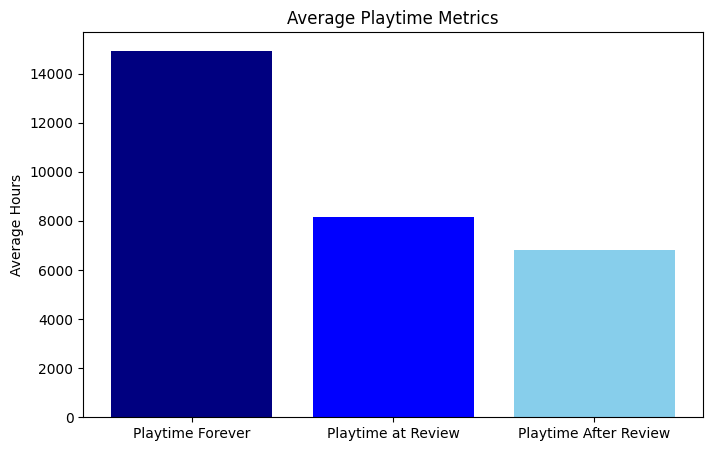

In [22]:
mean_values = [
    df['author.playtime_forever'].mean(),
    df['author.playtime_at_review'].mean(),
    df['playtime_after_review'].mean()
]

labels = ['Playtime Forever', 'Playtime at Review', 'Playtime After Review']
plt.figure(figsize=(8, 5))
plt.bar(labels, mean_values, color=['navy', 'blue', 'skyblue'])
plt.ylabel('Average Hours')
plt.title('Average Playtime Metrics')
plt.show()

# we calculate the average playtime metrics (playtime forever = total playtime,
# playtime at review and playtime after review) and use a Barplot to see graphically
# the differences

### **RQ2**


# ***2.1:*** *Identify which applications have the highest and lowest number of reviews.*

In [19]:
# Identify which applications have the highest and lowest number of reviews.

df.groupby('app_name')['review_id'].count().sort_values(ascending = False)

# we can see in the output below the apps with the highest and lowest number of
# reviews (the maximum number is 839838 and the minimum is 699)

,review_id
app_name,
Tom Clancy's Rainbow Six Siege,839838
Garry's Mod,653815
The Witcher 3: Wild Hunt,468330
Dead by Daylight,417994
Euro Truck Simulator 2,386277
...,...
Identity,1797
Rapture Rejects,1598
Slipstream,1101


# ***2.2:*** *Plot the number of reviews for each application in descending order. What insights can you draw from the plot?*

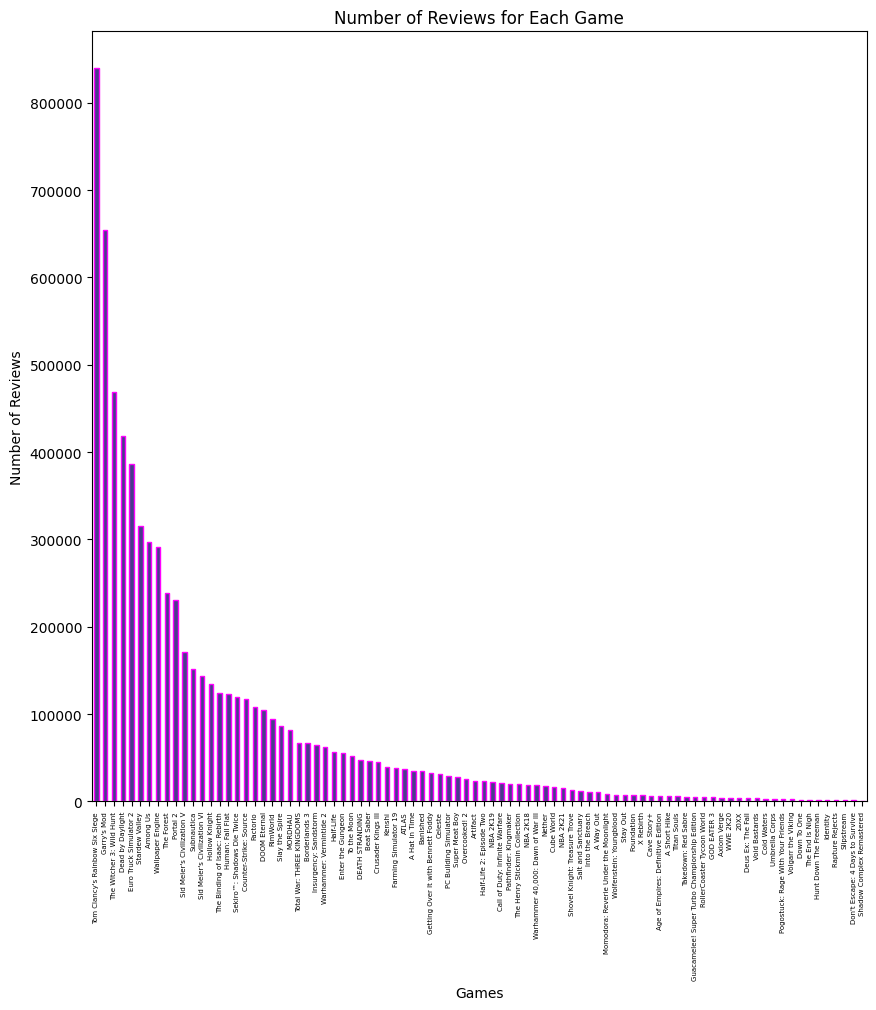

In [41]:
# Plot the number of reviews for each application in descending order. What insights can you draw from the plot?


df.groupby('app_name')['review_id'].count().sort_values(ascending = False).plot(kind = 'bar', figsize = (10, 10), color = 'darkslateblue', edgecolor = 'fuchsia')
plt.xticks(fontsize = 5)
plt.yticks(fontsize = 10)
plt.title('Number of Reviews for Each App')
plt.xlabel('App')
plt.ylabel('Number of Reviews')
plt.show()

# from the plot, we can see that the biggest part of reviews are concentrated in the
# first (about) 20 applications. It could be a synthom of their different popularity,
# and also of the number of players they have --> from an,
# economic point of view, this can imply a not strong enough kind
# of marketing for the game or something similar.

# this is also called "long-tail" case, and it is common to most of the
# digital platforms (a reduced part of the elements receive the most part of the attention --> EX: products
# in Amazon.com)

# Furthermore, we could have a kind of "Matthew Effect" where "Rich gets Richer" but in the
# sense that the more reviews an app have and the more it will have (and the contrary)



## ***2.3:*** *For the top 5 applications by number of reviews, how many reviews came from users who purchased the application versus those who received it for free? Provide a percentage breakdown and highlight any similarities.*

In [21]:
# For the top 5 applications by number of reviews, how many reviews came from users who purchased the application
# versus those who received it for free? Provide a percentage breakdown and highlight any similarities

# Count the number of reviews for every game
app_review_counts = df['app_name'].value_counts()

# Top 5 Games
top_5_apps = app_review_counts.head(5).index.tolist()

print("Top 5 App for number of reviews:")
for app in top_5_apps:
    print(app)

for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    # Number of reviews from who purchased the game on steam
    purchased_reviews = app_df[app_df['steam_purchase'] == True]
    num_purchased_reviews = len(purchased_reviews)
    perc_purchased_reviews = (num_purchased_reviews / total_reviews) * 100

    # Number of reviews from who received the game for free
    free_reviews = app_df[app_df['received_for_free'] == True]
    num_free_reviews = len(free_reviews)
    perc_free_reviews = (num_free_reviews / total_reviews) * 100

    # Print the results
    print(f"\nApp: {app}")
    print(f"Total number of reviews: {total_reviews}")
    print(f"Reviews from who purchased the app on steam: {num_purchased_reviews} ({perc_purchased_reviews:.2f}%)")
    print(f"Reviews from who received the app for free: {num_free_reviews} ({perc_free_reviews:.2f}%)")

# The majority of the reviews for each top 5 applications (in terms of reviews) are
# written by people who purchased the app on steam.

# There is a low percentage of reviews
# from users who have received the game for free.

# The percentages are similar between different applications,
# suggesting common trends in user behavior and distribution strategies.

# Reviews within a digital platform like "Steam" can generate attractive loops.
# Since a greater number of buyers on a platform makes the average rating of the
# product more informative, through reviews, a platform with such a system has
# positive network effects within the group among buyers.

# So, users are inclined to prefer the purchase on the platform from which
# they obtain information.

# This means: more buyers on the platform -> more reviews --> more buyers on the platform ---> etc.




Top 5 App for number of reviews:
Tom Clancy's Rainbow Six Siege
Garry's Mod
The Witcher 3: Wild Hunt
Dead by Daylight
Euro Truck Simulator 2

App: Tom Clancy's Rainbow Six Siege
Total number of reviews: 839838
Reviews from who purchased the app on steam: 700736 (83.44%)
Reviews from who received the app for free: 36233 (4.31%)

App: Garry's Mod
Total number of reviews: 653815
Reviews from who purchased the app on steam: 549792 (84.09%)
Reviews from who received the app for free: 24706 (3.78%)

App: The Witcher 3: Wild Hunt
Total number of reviews: 468330
Reviews from who purchased the app on steam: 428430 (91.48%)
Reviews from who received the app for free: 5738 (1.23%)

App: Dead by Daylight
Total number of reviews: 417994
Reviews from who purchased the app on steam: 305142 (73.00%)
Reviews from who received the app for free: 20183 (4.83%)

App: Euro Truck Simulator 2
Total number of reviews: 386277
Reviews from who purchased the app on steam: 288746 (74.75%)
Reviews from who received

In [25]:
for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    # Create a contingency table
    contingency_table = pd.crosstab(app_df['steam_purchase'], app_df['received_for_free'])

    contingency_table_perc = (contingency_table / total_reviews) * 100

    print(f"\nApp: {app}")
    print(f"Total Reviews number: {total_reviews}")
    print("Contingency Table:")
    print(contingency_table)
    print("Contingency Table (percent):")
    print(contingency_table_perc.round(2))



Applicazione: Tom Clancy's Rainbow Six Siege
Numero totale di recensioni: 839838
Tabella di contingenza (numeri assoluti):
received_for_free   False  True 
steam_purchase                  
False              125377  13725
True               678228  22508
Tabella di contingenza (percentuali):
received_for_free  False  True 
steam_purchase                 
False              14.93   1.63
True               80.76   2.68

Applicazione: Garry's Mod
Numero totale di recensioni: 653815
Tabella di contingenza (numeri assoluti):
received_for_free   False  True 
steam_purchase                  
False               96791   7232
True               532318  17474
Tabella di contingenza (percentuali):
received_for_free  False  True 
steam_purchase                 
False              14.80   1.11
True               81.42   2.67

Applicazione: The Witcher 3: Wild Hunt
Numero totale di recensioni: 468330
Tabella di contingenza (numeri assoluti):
received_for_free   False  True 
steam_purchase          

In [30]:
# Altair interactive graphics

import altair as alt

for app in top_5_apps:
    app_df = df[df['app_name'] == app]
    total_reviews = len(app_df)

    app_df['Category'] = app_df.apply(lambda row:
                                       'Purchased (Steam)' if row['steam_purchase'] and not row['received_for_free'] else
                                       'Free' if not row['steam_purchase'] and row['received_for_free'] else
                                       'Other', axis=1)

    category_counts = app_df['Category'].value_counts().reset_index()
    category_counts.columns = ['Category', 'Count']
    category_counts['Percentage'] = (category_counts['Count'] / app_df.shape[0]) * 100

    chart = alt.Chart(category_counts).mark_bar().encode(
        x=alt.X('Category', sort=['Purchased (Steam)', 'Free']),
        y='Count',
        color=alt.Color('Category', scale=alt.Scale(scheme='set2')),
        tooltip=['Category', 'Count', alt.Tooltip('Percentage', format='.2f')]
    ).properties(
        title=f"Review distribution for '{app}'"
    ).interactive()

    chart.display()


alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

alt.Chart(...)

## ***2.4:*** *Which applications have the most and the least user recommendations? Summarize your findings.*

In [ ]:
# Which applications have the most and the least user recommendations? Summarize your findings.

df.groupby('app_name')['recommended'].mean().sort_values(ascending = False)


# The top 5 applications for number of reccommendations are: "Factorio", "Portal 2", "Don't Escape: 4 Days to Survive",
# "RimWorld", "Wallpaper Engine".

# The least 5 applications for number of recommendations are: "Deus Ex: The Fall", "NBA 2K18", "Umbrella Corps",
# "RollerCoaster Tycoon World", "Identity".

# With our analysis we can observe how applications that meet or exceed players' expectations get better ratings.

# "Portal 2" and "Factorio" are examples of applications (games) that have met or exceeded the expectations of users,
# unlike games like "Umbrella Corps" (from the brand "Resident Evil") or "NBA 2K18", both with high expectations but
# which have been found to be of low quality (or in any case with obvious problems).

# Therefore, popularity can often lead to negative consequences, given by high expectations and greater attention
# to detail on the part of those who use the application.

,recommended
app_name,
Factorio,0.989188
Portal 2,0.987716
Don't Escape: 4 Days to Survive,0.985163
RimWorld,0.983044
Wallpaper Engine,0.981635
...,...
Deus Ex: The Fall,0.345607
NBA 2K18,0.291809
Umbrella Corps,0.281917


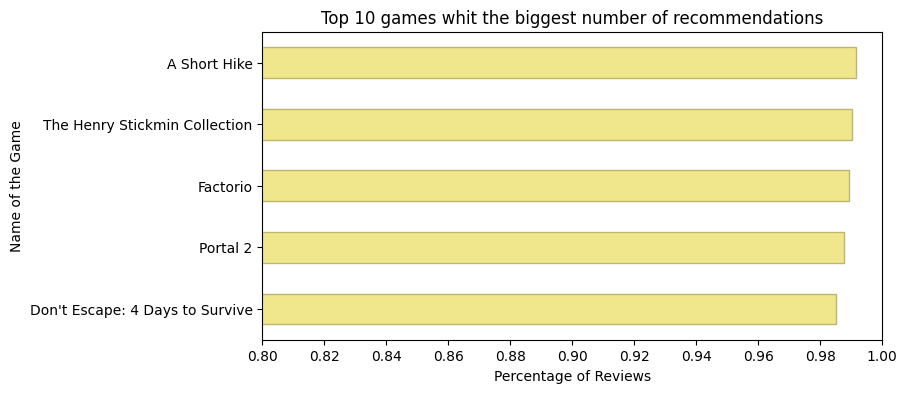

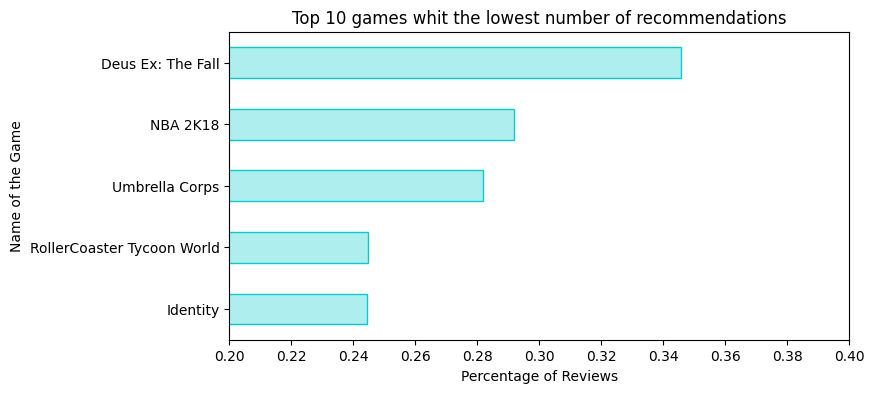

In [40]:
# Plots for 2.4

import numpy as np

recommendation_rates = df.groupby('app_name')['recommended'].mean().sort_values(ascending = False)


top_5_apps = recommendation_rates.head(5)

bottom_5_apps = recommendation_rates.tail(5)


plt.figure(figsize=(8, 4))
top_5_apps.sort_values().plot(kind='barh', color='khaki', edgecolor = 'darkkhaki')

x_ticks = np.linspace(0.8, 1.0, num=11)


plt.xlim([0.8, 1.0])
plt.xticks(x_ticks)
plt.xlabel('Percentage of Recommendations')
plt.ylabel('Name of the App')
plt.title('Top 5 apps whit the biggest number of recommendations')
plt.show()

plt.figure(figsize=(8, 4))
bottom_5_apps.sort_values().plot(kind='barh', color='paleturquoise', edgecolor = 'darkturquoise')

x_ticks2 = np.linspace(0.2, 0.4, num=11)

plt.xlim([0.2,0.4])
plt.xticks(x_ticks2)
plt.xlabel('Percentage of Recommendations')
plt.ylabel('Name of the App')
plt.title('Top 5 apps whit the lowest number of recommendations')
plt.show()


## ***2.5:*** *Is there a correlation between the number of recommendations and the applications' review scores? Use a statistical test to confirm the significance of the relationship.*


In [45]:
# Is there a correlation between the number of recommendations and the applications' review scores?
# Use a statistical test to confirm the significance of the relationship.

recommendations_per_app = df.groupby('app_name')['recommended'].sum().reset_index()
recommendations_per_app.rename(columns={'recommended': 'num_recommendations'}, inplace=True)


mean_review_score_per_app = df.groupby('app_name')['weighted_vote_score'].mean().reset_index()
mean_review_score_per_app.rename(columns={'weighted_vote_score': 'mean_review_score'}, inplace=True)


app_stats = pd.merge(recommendations_per_app, mean_review_score_per_app, on='app_name')

from scipy.stats import pearsonr


corr_coefficient, p_value = pearsonr(app_stats['num_recommendations'], app_stats['mean_review_score'])

print(f"Pearson Coefficent: {corr_coefficient:.4f}")
print(f"P-value: {p_value:.4e}")

from scipy.stats import spearmanr


corr_spearman, p_value_spearman = spearmanr(app_stats['num_recommendations'], app_stats['mean_review_score'])

print(f"Spearman Coefficent: {corr_spearman:.4f}")
print(f"Spearman P-value: {p_value_spearman:.4e}")


# Our analysis revealed a significant negative relationship between the number of recommendations
# and the average review score.

# We decided to use both Pearson and Spearman coefficients to better deepen our analysis:

# Pearson indicates a moderate negative linear correlation (measures the force and direction
# of the linear relationship but is sensitive to outliers and non-linearity).
# A value of -0.3859 indicates a moderate negative correlation between the number
# of recommendations and the average score of the reviews. The negative sign suggests that as
# the number of recommendations increases, the average review score tends to decrease (inversely proportional).
# The P-value of 0.00020439 (2.0439e-04) is much lower than the common significance level of 0.05 (p<0.05),
# indicating that the correlation is statistically significant.

# Spearman shows a strong monotonous negative correlation, suggesting a more consistent relationship in the ranks of variables
# (it is less influenced by outliers and measures the strength and direction of a monotonous relationship).
# A value of -0.7545 indicates a strong monotonous negative correlation between the two variables.
# This means that as the number of recommendations increases, the average score of the reviews tends to decrease substantially,
# although not necessarily linearly (as we supposed using Pearson).
# The P-value of 2.0923e-17 is extremely low (p<0.05), confirming that the correlation is highly significant.

# These results suggest that applications with a high number of recommendations tend to have lower average review scores,
# possibly due to greater exposure to a wider audience with a lot of different opinions (which can be more critical).

# Even with this analysis,  we can confirm what we have seen earlier: increased popularity can sometimes lead to
# negative consequences due to high user expectations.



Pearson Coefficent: -0.3859
P-value: 2.0439e-04
Spearman Coefficent: -0.7545
P-value: 2.0923e-17


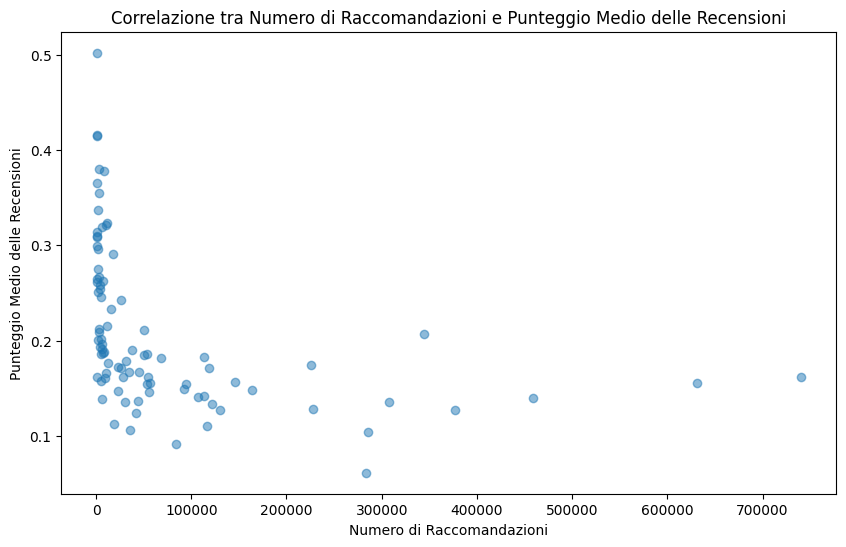

In [43]:
plt.figure(figsize=(10,6))
plt.scatter(app_stats['num_recommendations'], app_stats['mean_review_score'], alpha=0.5)
plt.xlabel('Number of Recommendations')
plt.ylabel('Mean Review Score')
plt.title('Correlation between Number of Recommendations and Mean Review Score')
plt.show()


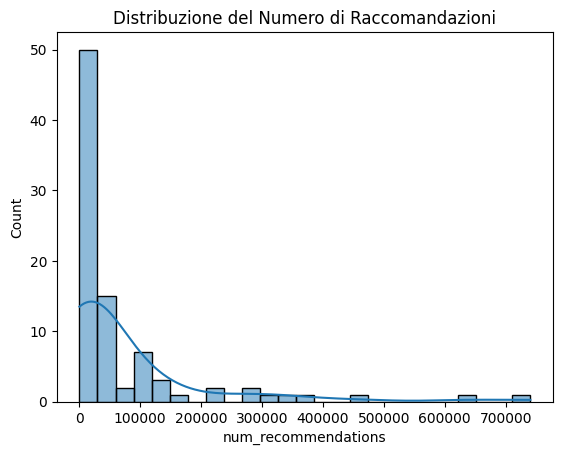

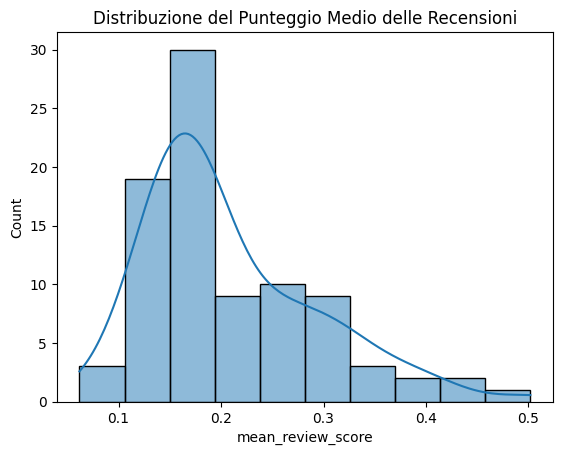

In [49]:
# controlla le distribuzioni

sns.histplot(app_stats['num_recommendations'], kde=True)
plt.title('Number of Recommendations Distribution')
plt.show()

sns.histplot(app_stats['mean_review_score'], kde=True)
plt.title('Mean Review Score Distribution')
plt.show()
